In [1]:
from mom import influxDB_utils as influx
from mom import Mandelbrot
from influxdb_client import Point
from datetime import datetime, timezone
import pandas as pd
import os

In [2]:
from dotenv import load_dotenv

# Load env from project root
load_dotenv()

#the following entries are expected in the MOM_Crypto_Bot/.env
ASSET = os.getenv("ASSET")
CURRENCY = os.getenv("CURRENCY")


In [3]:
def get_hurst(asset=ASSET, currency=CURRENCY):
    hurst_list=[]
    for x in ["Minute","Day"]:
        DF = influx.query_returns(asset=asset, interval=x, start=0, field="delta")

        #rescaled range method
        h = Mandelbrot.hurst()

        if x == "Day":
            h.fit(data=DF["delta"], power=8, rolling_window="false")
        #elif x == "Hour":
            #h.fit(data=DF["delta"], power=9, rolling_window="true")
        else:
            h.fit(data=DF["delta"], power=11, rolling_window="true")

        hurst_list.append(h.hurst)

    df = pd.DataFrame({
        "asset": [asset, asset],
        "currency": [currency, currency],
        "interval": ["Minute","Day"],
        "hurst": hurst_list
    })

    df["date"] = datetime.now(timezone.utc)
    df = df.set_index("date")
    
    return df

In [8]:
DF = get_hurst()
influx.write_dataframe(DF,measurement="Hurst")

Data gets divided into 46503 fixed windows of length 64
Data gets divided into 23251 fixed windows of length 128
Data gets divided into 11625 fixed windows of length 256
Data gets divided into 5812 fixed windows of length 512
Data gets divided into 2906 fixed windows of length 1024
Data gets divided into 1453 fixed windows of length 2048
Data gets divided into 62 fixed windows of length 64
Data gets divided into 31 fixed windows of length 128
Data gets divided into 15 fixed windows of length 256
Wrote 2 rows to InfluxDB bucket 'CryptoPrices---->Hurst'


Data gets divided into 689 fixed windows of length 64
Data gets divided into 344 fixed windows of length 128
Data gets divided into 172 fixed windows of length 256
Data gets divided into 86 fixed windows of length 512


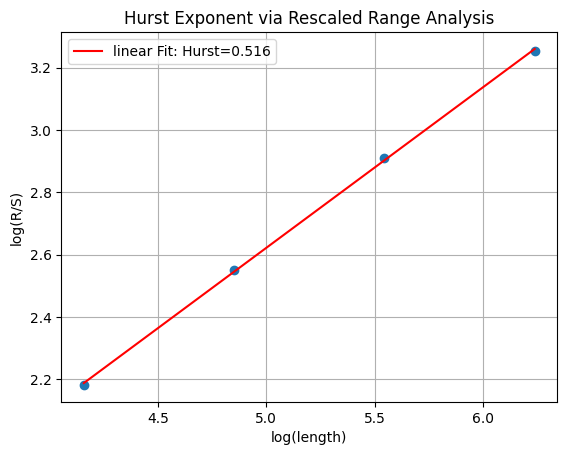

In [4]:
print(influx.get_last_timestamp("Day", ASSET, CURRENCY))
print(influx.get_last_timestamp("Minute", ASSET, CURRENCY))

Day last entry: 2025-09-15 00:00:00+00:00
2025-09-15 00:00:00+00:00
Minute last entry: 2025-09-15 18:38:00+00:00
2025-09-15 18:38:00+00:00


In [41]:
d = influx.get_last_timestamp("Day", ASSET, CURRENCY)
d.date().isoformat()

Day last entry: 2025-09-15 00:00:00+00:00


'2025-09-15'

In [31]:
#influx.get_last_timestamp("Day", ASSET, CURRENCY)[
    
    
#dates = pd.date_range(start="2025-01-01", end=, freq="D")
print(dates)

for day in dates:
    print(d)

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-09-06', '2025-09-07', '2025-09-08', '2025-09-09',
               '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-13',
               '2025-09-14', '2025-09-15'],
              dtype='datetime64[ns]', length=258, freq='D')
<bound method _Timestamp.day_name of Timestamp('2025-01-01 00:00:00')>
<bound method _Timestamp.day_name of Timestamp('2025-01-02 00:00:00')>
<bound method _Timestamp.day_name of Timestamp('2025-01-03 00:00:00')>
<bound method _Timestamp.day_name of Timestamp('2025-01-04 00:00:00')>
<bound method _Timestamp.day_name of Timestamp('2025-01-05 00:00:00')>
<bound method _Timestamp.day_name of Timestamp('2025-01-06 00:00:00')>
<bound method _Timestamp.day_name of Timestamp('2025-01-07 00:00:00')>
<bound method _Timestamp.day_name of Timestamp('2025-

In [12]:
def get_hurst_historic(asset=ASSET,currency = CURRENCY):
    
    print("reading Influx data")
    MIN = influx.query_returns(asset=asset, interval="Minute", start=0, field="delta")
    #print("min complete")
    #HOUR = influx.query_returns(asset=a, interval="Hour", start=0, field="delta")
    DAY = influx.query_returns(asset=asset, interval="Day", start=0, field="delta")
    
    dates = pd.date_range(start="2025-09-01", 
                          end=influx.get_last_timestamp("Day", ASSET, CURRENCY).date().isoformat(), 
                          freq="D")
    
    #print(start, end)
    print(dates)
    #rows = []
    #
    #maybe adjust for minute in min_before
    #
    for day in dates:
        print(day)
        min_before = MIN[MIN.index < day.isoformat()]
        #hour_before = HOUR[HOUR.index < day]
        day_before = DAY[DAY.index < day.isoformat()]
        #rescaled range method
        m = Mandelbrot.hurst()
        m.fit(data=min_before["delta"], power=11, rolling_window="true")
        
        #h = Mandelbrot.hurst()
        #h.fit(data=hour_before["delta"], power=8, rolling_window="true")
        
        d = Mandelbrot.hurst()
        d.fit(data=day_before["delta"], power=8, rolling_window="false")


        df = pd.DataFrame({
            "asset": [asset, asset],
            "currency": [currency, currency],
            "interval": ["Minute", "Day"],
            "hurst": [m.hurst, d.hurst],
            "date": [day, day]})


    #df = pd.DataFrame(rows)    
        df = df.set_index("date")
        print(df)
    return df

In [13]:
DF_hist = get_hurst_historic()

reading Influx data
DatetimeIndex(['2025-09-01', '2025-09-02', '2025-09-03', '2025-09-04',
               '2025-09-05', '2025-09-06', '2025-09-07', '2025-09-08',
               '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12',
               '2025-09-13', '2025-09-14', '2025-09-15'],
              dtype='datetime64[ns]', freq='D')
2025-09-01 00:00:00
Data gets divided into 46189 fixed windows of length 64
Data gets divided into 23094 fixed windows of length 128
Data gets divided into 11547 fixed windows of length 256
Data gets divided into 5773 fixed windows of length 512
Data gets divided into 2886 fixed windows of length 1024
Data gets divided into 1443 fixed windows of length 2048
Data gets divided into 62 fixed windows of length 64
Data gets divided into 31 fixed windows of length 128
Data gets divided into 15 fixed windows of length 256
           asset currency interval     hurst
date                                        
2025-09-01   BTC      EUR   Minute  0.527770
2025-

KeyboardInterrupt: 

In [19]:
dates = pd.date_range(start="2020-01-01", end="2020-08-31", freq="D")
dates


DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2025-08-22', '2025-08-23', '2025-08-24', '2025-08-25',
               '2025-08-26', '2025-08-27', '2025-08-28', '2025-08-29',
               '2025-08-30', '2025-08-31'],
              dtype='datetime64[ns]', length=2070, freq='D')

In [12]:


df_before = df[df.index < "2020-01-01"]


In [16]:
#calculate hurst daily starting 2020
for d in dates:
    
    

,delta,asset,currency,interval
time,,,,
2019-12-27 00:00:00+00:00,-69.072754,BTC,EUR,Day
2019-12-28 00:00:00+00:00,37.551270,BTC,EUR,Day
2019-12-29 00:00:00+00:00,102.648438,BTC,EUR,Day
2019-12-30 00:00:00+00:00,-70.412109,BTC,EUR,Day
2019-12-31 00:00:00+00:00,-116.470215,BTC,EUR,Day


In [24]:
client = influx.get_client()
query_api = client.query_api()

flux = f'''
    from(bucket: "{bucket}")
    |> range(start:0)
    |> filter(fn: (r) => r["asset"] == "hurst")
    |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
        '''
    
df = query_api.query_data_frame(flux)

In [15]:
client = influx.get_client()
query_api = client.query_api()

In [28]:
client = influx.get_client()
query_api = client.query_api()

bucket = "CryptoPrices"
flux = f'''
    from(bucket: "{bucket}")
    |> range(start:0)
    |> filter(fn: (r) => r["_measurement"] == "Hurst")
    |> pivot(rowKey:["_time"], columnKey: ["_field"], valueColumn: "_value")
    '''
df = query_api.query_data_frame(flux)

In [29]:
df

,result,table,_start,_stop,_time,_measurement,asset,currency,interval,hurst
0,_result,0,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-01-01 00:00:00+00:00,Hurst,BTC,EUR,Day,0.568027
1,_result,0,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-01-02 00:00:00+00:00,Hurst,BTC,EUR,Day,0.568027
2,_result,0,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-01-03 00:00:00+00:00,Hurst,BTC,EUR,Day,0.568027
3,_result,0,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-01-04 00:00:00+00:00,Hurst,BTC,EUR,Day,0.568027
4,_result,0,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-01-05 00:00:00+00:00,Hurst,BTC,EUR,Day,0.568027
...,...,...,...,...,...,...,...,...,...,...
727,_result,1,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-12-29 00:00:00+00:00,Hurst,BTC,EUR,Minute,0.502717
728,_result,1,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-12-30 00:00:00+00:00,Hurst,BTC,EUR,Minute,0.503050
729,_result,1,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2020-12-31 00:00:00+00:00,Hurst,BTC,EUR,Minute,0.503297
730,_result,1,1970-01-01 00:00:00+00:00,2025-09-15 20:49:36.747027+00:00,2021-01-01 00:00:00+00:00,Hurst,BTC,EUR,Minute,0.503297


In [21]:
if not df.empty:
        df["_time"] = pd.to_datetime(df["_time"])
        filename = f"{bucket}_hurst.csv"
        filepath = os.path.join(output_dir, filename)
        df.to_csv(filepath, index=False)

ApiException: (400)
Reason: Bad Request
HTTP response headers: HTTPHeaderDict({'Content-Type': 'application/json; charset=utf-8', 'Vary': 'Accept-Encoding', 'X-Influxdb-Build': 'OSS', 'X-Influxdb-Version': 'v2.7.12', 'X-Platform-Error-Code': 'invalid', 'Date': 'Mon, 15 Sep 2025 20:40:36 GMT', 'Transfer-Encoding': 'chunked'})
HTTP response body: b'{"code":"invalid","message":"compilation failed: error @3:8-3:29: expected comma in property list, got COLON\\n\\nerror @3:26-3:28: missing property key"}'
